In [235]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [226]:
db14 = pd.read_csv('WNBA14.csv')
db15 = pd.read_csv('WNBA15.csv')
db16 = pd.read_csv('WNBA16.csv')
db17 = pd.read_csv('WNBA17.csv')
db18 = pd.read_csv('WNBA18.csv')
db19 = pd.read_csv('WNBA19.csv')

db = pd.concat([db17, db16, db15, db14]).reset_index(drop = True)

/Users/ahelgeso/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [227]:
cols =  ['Result','Rolling4TSP','Rolling4TOV','Rolling4ORB','Rolling4FTR','Rolling4Poss','Opp R4Poss','Opp R4TSP','Opp R4TOV','Opp R4ORB','Opp R4FTR', 'Rolling4DEff', 'Opp R4DEff', 'Rolling4OEff','Opp R4OEff']
featureCols = ['Rolling4TSP','Rolling4TOV','Rolling4ORB',
                   'Rolling4FTR','Rolling4Poss','Opp R4Poss','Opp R4TSP',
                   'Opp R4TOV','Opp R4ORB','Opp R4FTR', 'Rolling4DEff', 
                   'Opp R4DEff', 'Rolling4OEff','Opp R4OEff']
target = ['Result']
db = db[cols].dropna()

In [228]:
X = preprocessing.scale(db[featureCols])
X = pd.DataFrame(X, columns = featureCols)
y = np.array(db[target]).flatten()

In [229]:
dogs2018 = db18[db18['Line'] > 0]

In [230]:
cols18 =  ['Result','Rolling4TSP','Rolling4TOV','Rolling4ORB','Rolling4FTR','Rolling4Poss','Opp R4Poss','Opp R4TSP','Opp R4TOV','Opp R4ORB','Opp R4FTR', 'Rolling4DEff', 'Opp R4DEff', 'Rolling4OEff','Opp R4OEff','Odds']
dogs2018 = dogs2018[cols18].dropna().reset_index()

In [231]:
dogs2018_feat = preprocessing.scale(dogs2018[featureCols])
dogs2018_feat = pd.DataFrame(dogs2018_feat, columns = featureCols)
dogs2018_y = np.array(dogs2018[target]).flatten()

In [216]:
preds_avg = []
n = 100

for i in range(n):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.1).fit(x_train, y_train)

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    gbc = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, max_depth=1).fit(x_train, y_train)

    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    eclf1 = VotingClassifier(estimators=[('ada', ada), ('gbc', gbc)], voting='soft')
    eclf1 = eclf1.fit(x_train, y_train)

    pred = eclf1.predict(dogs2018_feat)
    
    preds_avg.append(pred)
    
    if i%10 == 0:
        print("Model #:", i)

preds = [sum(i) for i in zip(*preds_avg)]

Model #: 0
Model #: 10
Model #: 20
Model #: 30
Model #: 40
Model #: 50
Model #: 60
Model #: 70
Model #: 80
Model #: 90


In [232]:
odds = []
wins = []
losses = []
profit = []
t3l = []
t2l = []
t1l = []
t3 = 0.82 * n
t2 = 0.66 * n
t1 = 0.5 * n

for i, n in enumerate(preds):
    if n >= t1 and dogs2018['Result'][i] == 1:
        wins.append(1)
        profit.append(dogs2018['Odds'][i])
        odds.append(dogs2018['Odds'][i])
        t3l.append(1)
    elif n >= t1 and dogs2018['Result'][i] == 0:
        losses.append(1)
        profit.append(-100)
        odds.append(dogs2018['Odds'][i])
        t3l.append(1)
#     elif n >= t1 and dogs2018['Result'][i] == 1:
#         wins.append(1)
#         profit.append(2 * dogs2018['Odds'][i])
#         odds.append(dogs2018['Odds'][i])
#         t2l.append(1)
#     elif n >= t1 and dogs2018['Result'][i] == 0:
#         losses.append(1)
#         profit.append(-200)
#         odds.append(dogs2018['Odds'][i])
#         t2l.append(1)
#     elif n >= t1 and dogs2018['Result'][i] == 1:
#         wins.append(1)
#         profit.append(dogs2018['Odds'][i])
#         odds.append(dogs2018['Odds'][i])
#         t1l.append(1)
#     elif n >= t1 and dogs2018['Result'][i] == 0:
#         losses.append(1)
#         profit.append(-100)
#         odds.append(dogs2018['Odds'][i])
#         t1l.append(1)
    else:
        profit.append(0)
        
avg_odds = statistics.mean(odds)
profits = sum(profit)
total_bet = 100 * (len(wins) + len(losses))
ROI = profits/total_bet
    
print('wins:', len(wins), ' losses:', len(losses), 'profit:', profits, 'total risk:', total_bet, 'avg odds:', avg_odds, 'ROI:', ROI)

wins: 37  losses: 51 profit: 2356.0 total risk: 8800 avg odds: 238.57954545454547 ROI: 0.2677272727272727


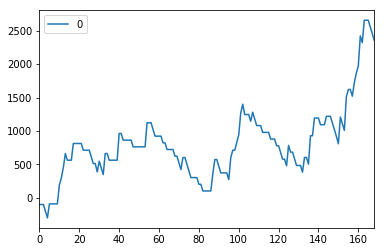

In [236]:
pd.DataFrame(profit).cumsum().plot()